# Assignment 0

Name: Anushka Deshpande  
USC ID: 5914802345  
Github Username: anushka-deshpande

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Pandas

This section is for practising basic functions in pandas. 

#### (a) Considering Salaries.csv file

We consider the Salaries.csv file located in the data folder of our root directory. 

#### (b) Read_csv() method

In [2]:
data = pd.read_csv('data/Salaries.csv', skiprows=[2])
data.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,benedbr01,545000
2,1985,ATL,NL,campri01,633333
3,1985,ATL,NL,ceronri01,625000
4,1985,ATL,NL,chambch01,800000


We use the .describe and .info functions to get insights on the data

In [3]:
data.describe

<bound method NDFrame.describe of        yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  benedbr01    545000
2        1985    ATL   NL   campri01    633333
3        1985    ATL   NL  ceronri01    625000
4        1985    ATL   NL  chambch01    800000
...       ...    ...  ...        ...       ...
25569    2015    WAS   NL  treinbl01    512800
25570    2015    WAS   NL  ugglada01    507500
25571    2015    WAS   NL  werthja01  21000000
25572    2015    WAS   NL  zimmejo02  16500000
25573    2015    WAS   NL  zimmery01  14000000

[25574 rows x 5 columns]>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25574 entries, 0 to 25573
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    25574 non-null  int64 
 1   teamID    25574 non-null  object
 2   lgID      25574 non-null  object
 3   playerID  25574 non-null  object
 4   salary    25574 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


#### (c) make column PlayerID as index column adn first row as header. Skip second row while reading file.

The second row has been skipped in cell no. 2.

In [5]:
data.set_index('playerID')

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


#### (d) Select the id of the players who are registered in ATL and HOU whose salary is higher than one million.

In [6]:
df_filtered = data.loc[((data.teamID=='ATL') | (data.teamID=='HOU')) & (data.salary > 1000000)]
df_filtered_ids = df_filtered['playerID'].tolist()

In [7]:
print(df_filtered_ids)

['hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'griffke01', 'murphda05', 'suttebr01', 'ryanno01', 'murphda05', 'suttebr01', 'smithda02', 'murphda05', 'suttebr01', 'clancji01', 'davisgl01', 'ramirra01', 'scottmi03', 'smithda02', 'esaskni01', 'murphda05', 'smithlo01', 'suttebr01', 'whitter01', 'clancji01', 'darwida01', 'davisgl01', 'deshaji01', 'scottmi03', 'smithda02', 'breamsi01', 'esaskni01', 'gantro01', 'leibrch01', 'pendlte01', 'smithlo01', 'caminke01', 'deshaji01', 'ramirra01', 'scottmi03', 'berenju01', 'bielemi01', 'breamsi01', 'esaskni01', 'gantro01', 'glavito02', 'leibrch01', 'nixonot01', 'penaal01', 'pendlte01', 'smithlo01', 'smoltjo01', 'treadje01', 'biggicr01', 'caminke01', 'finlest01', 'jonesdo01', 'portuma01', 'blausje01', 'breamsi01', 'gantro01', 'glavito02', 'justida01', 'maddugr01', 'nixonot01', 'pendlte01', 'sandede02', 'smithpe02', 'smoltjo01', 'biggicr01', 'caminke01', 'drabedo01', 'finlest01', 'harnipe01', 'jone

### (e) use describe() to calculate **standard** deviation, first quartile, median, third quartile, mean, amximum and minimum of salaries in team ATL

In [8]:
df_ATL = data.loc[data['teamID'] == 'ATL']
df_ATL['salary'].describe()

count    8.850000e+02
mean     2.208111e+06
std      3.434162e+06
min      6.000000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.400000e+06
max      1.606180e+07
Name: salary, dtype: float64

#### (f) Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows() method to iterate each row of the dataframe and copy it to a dictionary.

In [9]:
dict_obj = {}
for row in data.iterrows():
  row_data = row[1]
  for key, value in row_data.items():
    if(key in dict_obj):
      dict_obj[key].append(str(value))
    else:
      dict_obj[key] = [str(value)]

#### (g) Create a dataframe using pd.DataFrameRead (Documentation Link) and from the dictionary created in (e). Then, change the header to "a", "b", "c", ... .

In [10]:
new_df = pd.DataFrame(dict_obj)
new_df.columns = ['a', 'b', 'c', 'd', 'e']
new_df.head()

,a,b,c,d,e
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,benedbr01,545000
2,1985,ATL,NL,campri01,633333
3,1985,ATL,NL,ceronri01,625000
4,1985,ATL,NL,chambch01,800000


## 5. Numpy

#### (a) Create a 2-dimensional Python list object, then convert it to a Numpy array object

In [11]:
list_obj = [[1,2,3,4,5,6],[7,8,9,10,11,12]]
arr = np.array(list_obj)
arr

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

#### (b) Examine the ndim, shape, size, dtype, itemsize, and data attributes of the numpy array object. Make sure you understand their functions

In [12]:
print("ndims: ", arr.ndim)
print("shape: ", arr.shape)
print("size: ", arr.shape)
print("dtype: ", arr.dtype)
print("itemsize: ", arr.itemsize)
print("data: ", arr.data)

ndims:  2
shape:  (2, 6)
size:  (2, 6)
dtype:  int64
itemsize:  8
data:  <memory at 0x15b433e10>


#### (c) Learn the dimension concept of an ndarray object by using reshape() and flatten() methods

In [13]:
reshaped = arr.reshape(4,3)
print(reshaped)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [14]:
flattened = arr.flatten()
print(flattened)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


#### (d) Understand how the slice operation works for 1-D arrays and 2-D arrays

In [15]:
one_dim_arr = [2,3,4,5,6,7,8,9]
two_dim_arr = arr

one_dim_sliced = one_dim_arr[3:]
print("One dimensional array sliced: ", one_dim_sliced)

two_dim_sliced = two_dim_arr[1:, :3]
print("Two dimensional array sliced: ", two_dim_sliced)

One dimensional array sliced:  [5, 6, 7, 8, 9]
Two dimensional array sliced:  [[7 8 9]]


#### (e) Learn operations on ndarray by examining the argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), and mod() methods. Make yourself comfortable with these methods

In [16]:
arr = [[ 1,  -2,  3],
       [ 4,  5,  6],
       [ 7,  8,  -9],
       [10, -11, 12]]
arr

[[1, -2, 3], [4, 5, 6], [7, 8, -9], [10, -11, 12]]

In [17]:
print("np.argmin(): ", np.argmin(arr))

np.argmin():  10


In [18]:
print("np.argmax(): ", np.argmax(arr))

np.argmax():  11


In [19]:
print("np.min(): ", np.min(arr))

np.min():  -11


In [20]:
print("np.max(): ", np.max(arr))

np.max():  12


In [21]:
print(np.mean(arr))

2.8333333333333335


In [22]:
print(np.sum(arr))

34


In [23]:
print(np.std(arr))

6.792561290771611


In [24]:
print(np.dot(arr, 4))

[[  4  -8  12]
 [ 16  20  24]
 [ 28  32 -36]
 [ 40 -44  48]]


In [25]:
print(np.square(arr))

[[  1   4   9]
 [ 16  25  36]
 [ 49  64  81]
 [100 121 144]]


In [26]:
print(np.sqrt(arr))

[[1.                nan 1.73205081]
 [2.         2.23606798 2.44948974]
 [2.64575131 2.82842712        nan]
 [3.16227766        nan 3.46410162]]


/var/folders/hg/q117szn17clgzm01y8dvkqkc0000gn/T/ipykernel_23521/3400393474.py:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(arr))


In [27]:
print(np.abs(arr))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [28]:
print(np.exp(arr))

[[2.71828183e+00 1.35335283e-01 2.00855369e+01]
 [5.45981500e+01 1.48413159e+02 4.03428793e+02]
 [1.09663316e+03 2.98095799e+03 1.23409804e-04]
 [2.20264658e+04 1.67017008e-05 1.62754791e+05]]


In [29]:
print(np.sign(arr))

[[ 1 -1  1]
 [ 1  1  1]
 [ 1  1 -1]
 [ 1 -1  1]]


In [30]:
print(np.mod(arr, 5))

[[1 3 3]
 [4 0 1]
 [2 3 1]
 [0 4 2]]


#### (f) Examine the arange(), ones(), zeros(), eye(), linspace(), and concatenate() methods. Make yourself comfortable with these methods.

In [31]:
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


In [32]:
print(np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [33]:
print(np.zeros((2,4)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [34]:
print(np.eye(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [35]:
print(np.linspace(0, 10, 5))

[ 0.   2.5  5.   7.5 10. ]


In [36]:
arr1 = np.arange(7)
arr2 = np.arange(3, 9)

print(np.concatenate((arr1, arr2), axis=0))

[0 1 2 3 4 5 6 3 4 5 6 7 8]


## 6. Scikit-Learn
This section introduces some packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignments. You must become familiar with them and use them masterfully.

• Data Preprocessing  
  >  – Standardization: StandardScaler  
    – Normalization: MinMaxScaler  
    – Quantifying Categorical Features: LabelEncoder. OneHotEncoder  
    – Construct Train and Test Sets: model_selection.train_test_split  

• KNN: KNeighborsClassifier  
• Linear Regression: LinearRegression  
• Logistic Regression: LogisticRegression, LogisticRegressionCV  
• Feature Selection / Model Selection   
  >  – L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV  
    – L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV  
    – Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score  
    – Model Metrics (Documentation Link): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score  

• Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor  
• Bootstrap, Ensemble Methods    
  >  – Bootstrap: bootstrapped   
    – Bagging: RandomForestClassifier, RandomForestRegressor    
    – Boosting: AdaBoostClassifier, AdaBoostRegressor    

•Support Vector Machines (Documentation Link): LinearSVC, LinearSVR  
• Multiclass and Multilabel Classification  
  >  – One-vs-one Multiclass Strategy: OneVsOneClassifier  
    – One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier  

• Unsupervised Learning  
 >   – K-means Clustering: KMeans  
    – Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)  

• Semi-supervised Learning 

## (7) Git and Github

(a) In the directory of this jupyter notebook file locates, initiate a Git repository.  
(b) Check out a new branch called dev and commit the current notebook within this branch.  
(c) Merge the dev branch to the master branch (the default branch).  
(d) Create a temporary repository (just for practicing and you can delete it later) in GitHub.  
(e) Push new changes in the master branch to the remote repository created in step (d).  
(f) Checkout the dev branch again and do some changes to your notebook, and then repeat step (c) and step (e).

## (8) MatplotLib

#### (a) reate two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

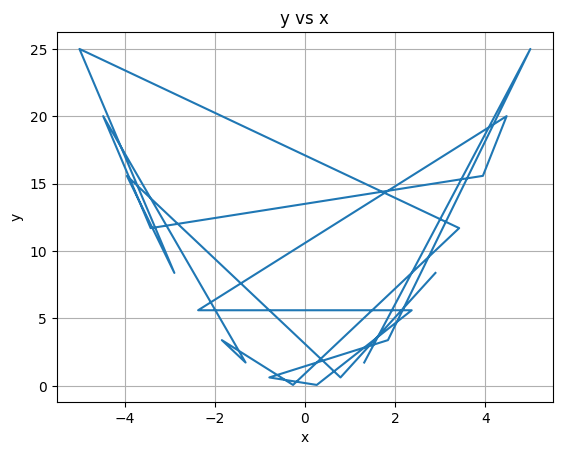

In [37]:
#need to sort before plotting else this is observed

x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])

plt.plot(x, y)

plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

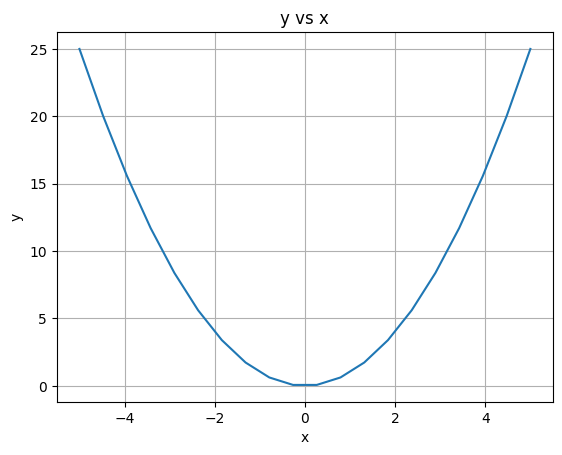

In [38]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x, y)

plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#### (b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot

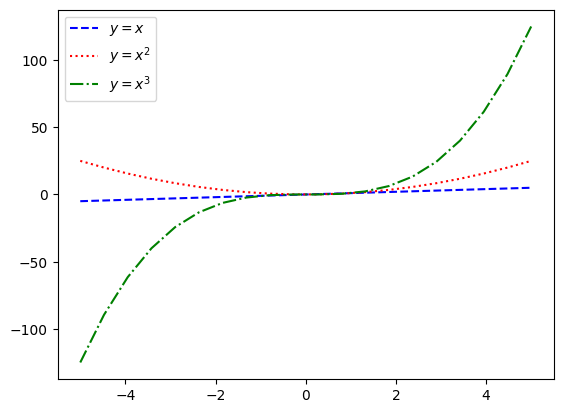

In [39]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

# Set the line styles
line_style1 = '--'
line_style2 = ':'
line_style3 = '-.'

# Plot the curves
plt.plot(x, y1, label='$y=x$', linestyle=line_style1, color='b')
plt.plot(x, y2, label='$y=x^2$', linestyle=line_style2, color='r')
plt.plot(x, y3, label='$y=x^3$', linestyle = line_style3, color='g')

# Add legends
plt.legend(['$y=x$', '$y=x^2$', '$y=x^3$'], loc='upper left')

# Show the plot
plt.show()


#### (c) Create multiple subplots, play around with the figure size, text font/size.

/var/folders/hg/q117szn17clgzm01y8dvkqkc0000gn/T/ipykernel_23521/2457951764.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


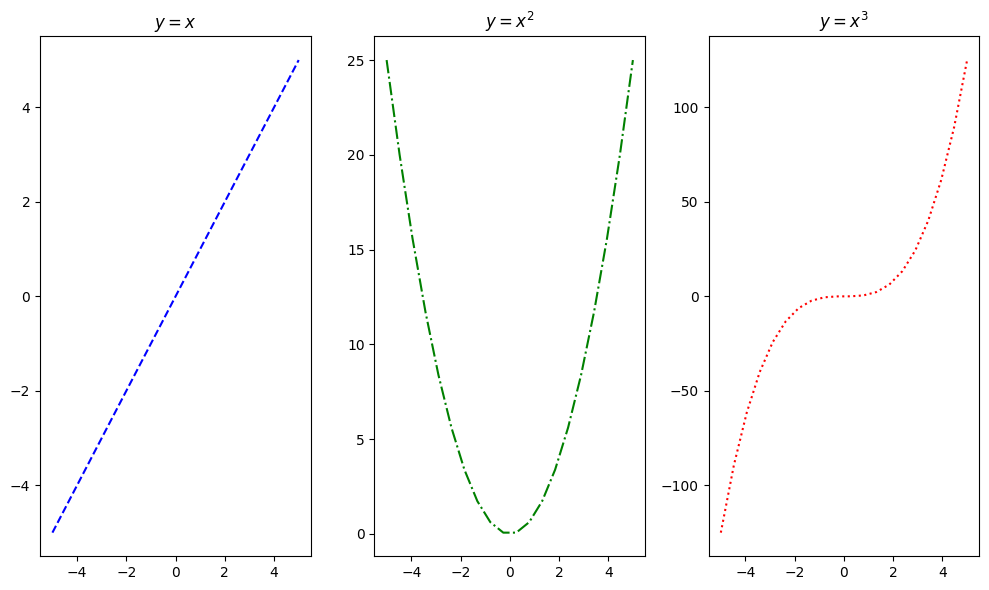

In [40]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the figure title
plt.title('Multiple subplots', fontstyle='italic', fontsize=16)

# Plot the curves in subplots
plt.subplot(131)
plt.plot(x, y1, linestyle='--', color='b')
plt.title('$y=x$')

plt.subplot(132)
plt.plot(x, y2, linestyle='-.', color='g')
plt.title('$y=x^2$')

plt.subplot(133)
plt.plot(x, y3, linestyle=':', color='r')
plt.title('$y=x^3$')

# Show the plot
plt.tight_layout()
plt.show()


#### (d) Get familiar with get current axis (gca) handle to do the above tasks

Axes(0.125,0.11;0.775x0.77)


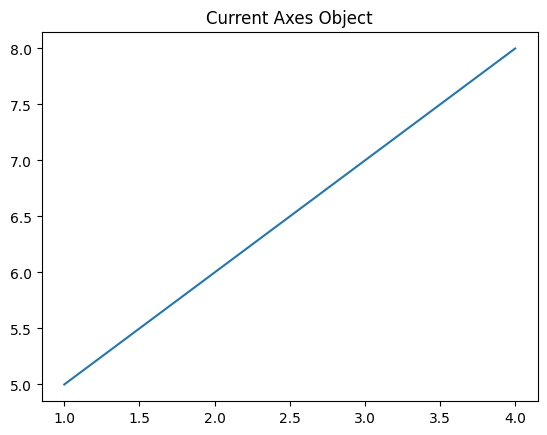

In [41]:
fig, ax = plt.subplots()
current_axes = plt.gca()
print(current_axes)

current_axes.set_title('Current Axes Object')
plt.plot([1, 2, 3, 4], [5, 6, 7, 8])
plt.show()


#### (e) Change the limits on x and y axes, use logarithmic axes to plot.

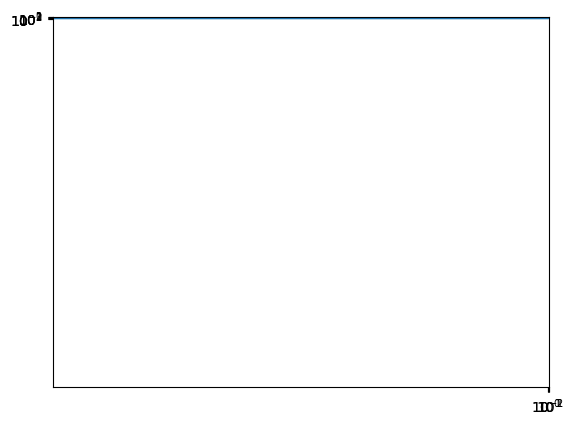

In [42]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

# Set the x-axis limits
plt.xlim(-10, 10)

# Set the y-axis limits
plt.ylim(0, 100)

# Set the x-axis and y-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Plot the parabola
plt.plot(x, y)

# Show the plot
plt.show()


## 9. Seaborn

#### (a) Use the salaries.csv file in pandas section

In [43]:
df = data
df

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,benedbr01,545000
2,1985,ATL,NL,campri01,633333
3,1985,ATL,NL,ceronri01,625000
4,1985,ATL,NL,chambch01,800000
...,...,...,...,...,...
25569,2015,WAS,NL,treinbl01,512800
25570,2015,WAS,NL,ugglada01,507500
25571,2015,WAS,NL,werthja01,21000000
25572,2015,WAS,NL,zimmejo02,16500000


#### (b) Create a dataframe and try to plot it with seaborn.

/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/ve

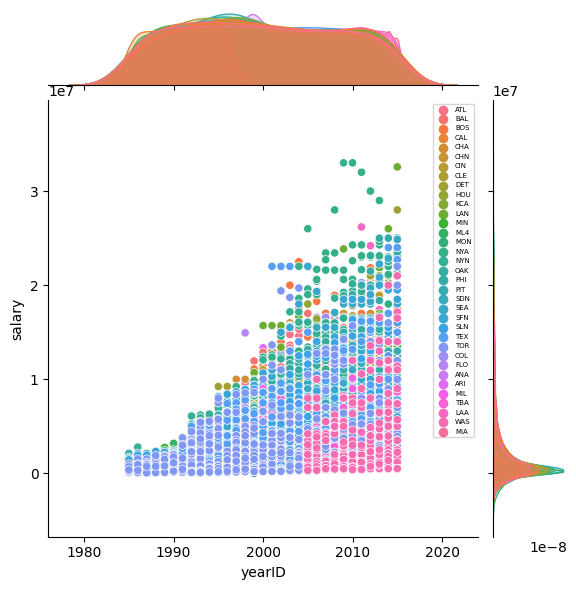

In [44]:
sns.jointplot(x='yearID', y='salary', data=df, hue='teamID')

# Show the plot
plt.legend(fontsize=5)
plt.show()


#### (c) Perform statistical estimation on the data using seaborn in-built functions - lm-plot, catplot, relpolt

/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


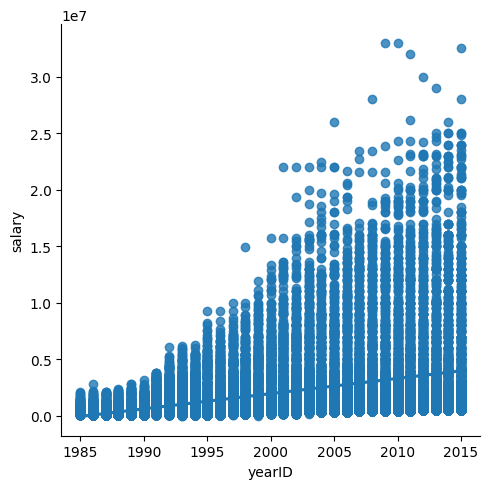

In [45]:
#lmplot
sns.lmplot(x='yearID', y='salary', data=df)
plt.show()

/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/ve

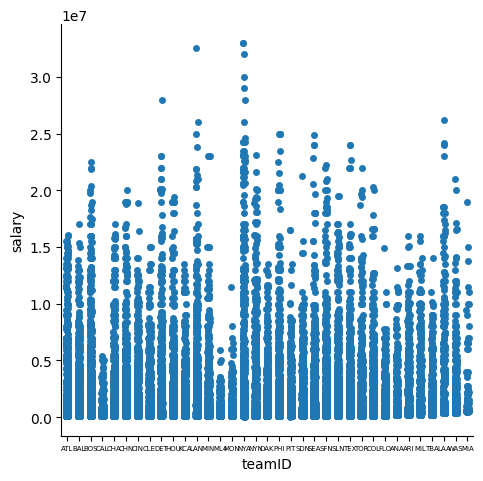

In [46]:
#catplot
sns.catplot(x='teamID', y='salary', data=df)
plt.xticks(fontsize=5)
plt.show()

/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/ve

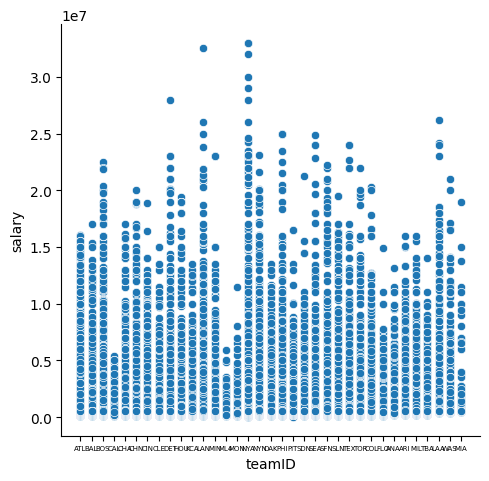

In [47]:
#relplot
sns.relplot(x='teamID', y='salary', data=df)
plt.xticks(fontsize=5)
plt.show()

#### (d) Create axis level functions like boxplot to visualise

/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


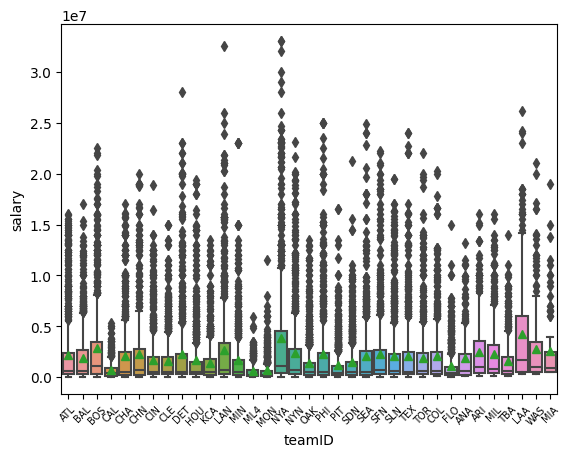

In [48]:
sns.boxplot(
    x = "teamID",
    y = "salary",
    showmeans=True,
    data=df
)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45, fontsize=7)

# Show the plot
plt.show()

#### (e) Visualize the dataset structure using pairplot and jointplot

/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/ve

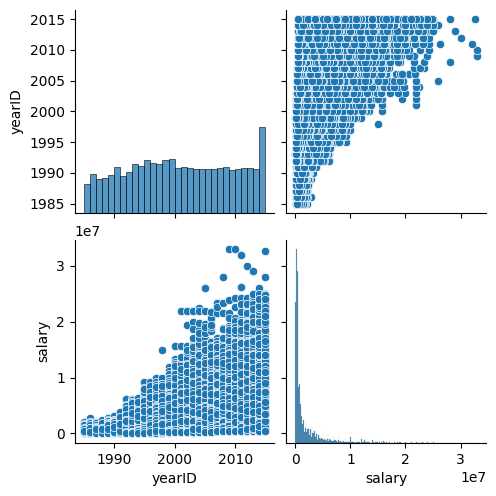

In [49]:
sns.pairplot(df)
plt.show()

/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anushkadeshpande/softwareProjects/JupyterNotebook/DSCI552/ve

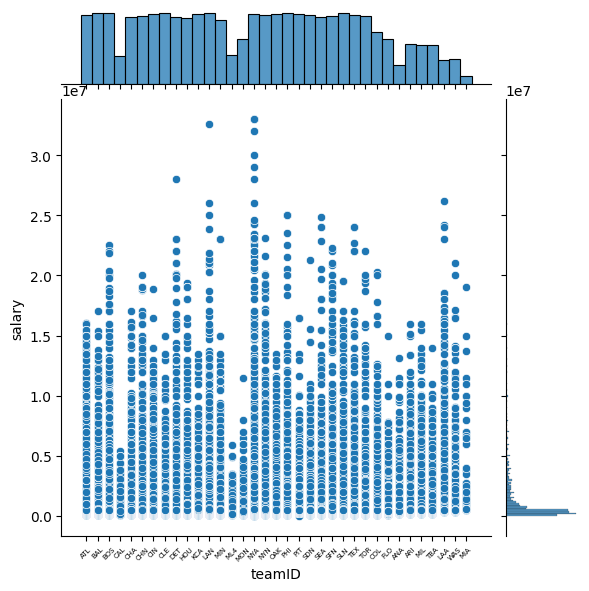

In [50]:
sns.jointplot(
    x = "teamID",
    y = "salary",
    data=df)
plt.xticks(rotation=45,fontsize=5)
plt.show()